<a href="https://colab.research.google.com/github/Santoshuske/Item-Demand-Forecasting/blob/main/DemandForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Colab Notebooks/dataset')

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('train 2.csv',low_memory=False,parse_dates=['date'],index_col=['date'])
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [4]:
df.shape

(913000, 3)

In [5]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
df=df.sort_values('date',ascending=True)
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,7,12,26
2013-01-01,7,46,27
2013-01-01,8,12,54
2013-01-01,9,12,35
...,...,...,...
2017-12-31,9,34,21
2017-12-31,10,34,32
2017-12-31,1,35,55


sorting according to date

# Group by Item Level

In [7]:
data=df.groupby(['item','date'])['sales'].sum().reset_index()
data.head()

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149


In [17]:
data.shape

(91300, 3)

grouped according to item level sales

# Three Months Agregating

In [25]:
datas=[]
for i in data.item.unique():
  tmp=data.loc[data.item==i,:]
  tmp['sales']=tmp['sales'].rolling(90).sum().shift(-89)
  datas.append(tmp)

three months aggregating 

In [26]:
len(datas)

50

In [27]:
for i in range(len(datas)):
  datas[i]=datas[i].dropna(axis=0)

In [19]:
import matplotlib.pyplot as plt


# Year VS Sales

Enter the item number to view sales of each item : 0


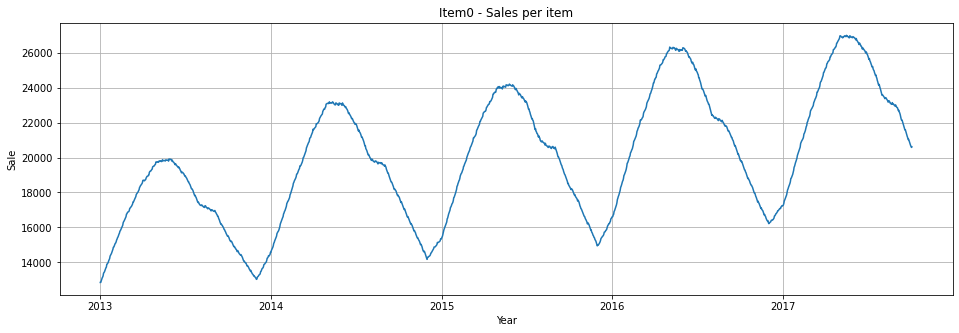

In [28]:
def plot_item(df_raw,i):
  plt.subplots(figsize=(16,5))
  plt.grid()
  plt.xlabel("Year")
  plt.ylabel("Sale")
  plt.title('Item' +str(i)+' - Sales per item')
  plt.plot(df_raw['date'],df_raw['sales'])


item_input=int(input('Enter the item number to view sales of each item : '))
plot_item(datas[item_input],item_input)

From above graph we see that as month changes sales also changes as mid year 
sales is top end of year sales is low(bottom) for sales mid year most importatnt

# Date Feature Creating New Features

In [29]:
def date_features(datas):
  for i in range(len(datas)):
    datas[i]['year']=datas[i].date.dt.year
    datas[i]['month']=datas[i].date.dt.month
    datas[i]['day_of_month']=datas[i].date.dt.day
    datas[i]['day_of_year']=datas[i].date.dt.dayofyear
    datas[i]['week']=datas[i].date.dt.weekofyear
    datas[i]['day_of_week']=datas[i].date.dt.dayofweek
    datas[i]['is_kind']=datas[i].date.dt.weekday//5
    datas[i]['is_month_start']=datas[i].date.dt.is_month_start.astype(int)
    datas[i]['is_month_end']=datas[i].date.dt.is_month_end.astype(int)
  return datas


datas=date_features(datas)
datas[0].head()


,item,date,sales,year,month,day_of_month,day_of_year,week,day_of_week,is_kind,is_month_start,is_month_end
0,1,2013-01-01,12847.0,2013,1,1,1,1,1,0,1,0
1,1,2013-01-02,12848.0,2013,1,2,2,1,2,0,0,0
2,1,2013-01-03,12936.0,2013,1,3,3,1,3,0,0,0
3,1,2013-01-04,13019.0,2013,1,4,4,1,4,0,0,0
4,1,2013-01-05,13103.0,2013,1,5,5,1,5,1,0,0


By using date created day of month, day of year,week,day of week, is kind, is month start, is month end.



# Year vs Sales

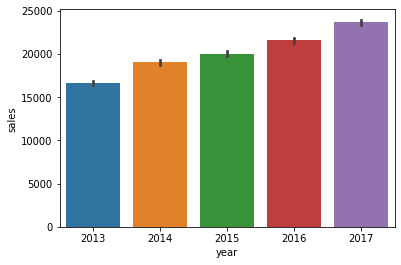

In [30]:
import seaborn as sns
sns.barplot(datas[0]['year'],datas[0]['sales'])

1.This graph shows there is relation between year and sales as year changes sales also increasing.

2.There is linear relation between year and sales

# Month vs Sales

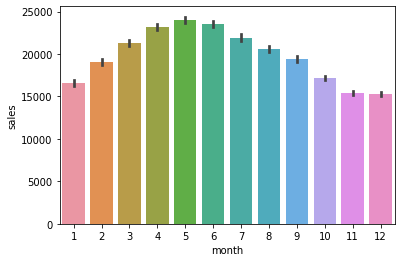

In [31]:
sns.barplot(datas[0]['month'],datas[0]['sales'])

1.As month increasing sales also increasing till the mid of year (may) then decreasing the sales 

2.There is no linear relation between month and sales

# Week vs Sales

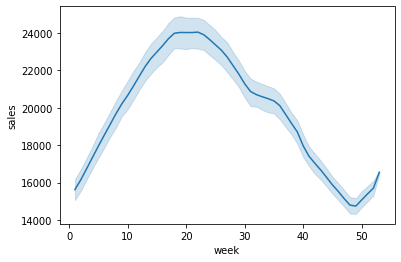

In [32]:
sns.lineplot(datas[0]['week'],datas[0]['sales'])

1.By this graph shows the middle of the year sales is top and year end sales decreases

2.there is no linear relation between week vs sales

# Day of year vs Slaes

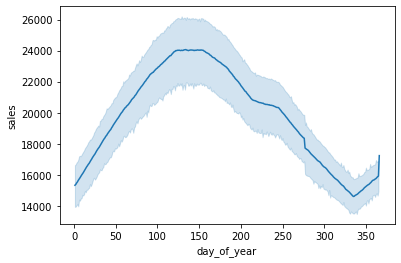

In [33]:
sns.lineplot(datas[0]['day_of_year'],datas[0]['sales'])

1.According graph most sales is 140 to 160 day of year

2.There is no relation between day of year vs sales

In [57]:
datas[0]['is_month_start'].unique()

array([1, 0])

# Day of Month VS Sales

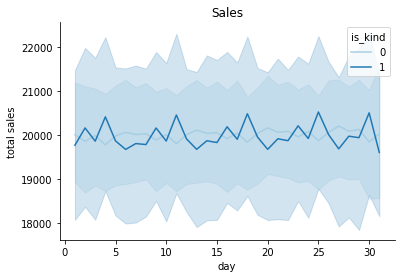

In [54]:
sns.set_palette(sns.color_palette('Paired'))

ax=sns.lineplot(x='day_of_month',y='sales',data=datas[0],hue='is_kind')
ax.set_title('Sales')
ax.set_xlabel('day')
ax.set_ylabel('total sales')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

There is no linear relation

1.we see that all above graphs some features are not linear relation
hence we build non linear models

In [35]:
datas[0].shape

(1737, 12)

In [36]:
datas[0].columns

Index(['item', 'date', 'sales', 'year', 'month', 'day_of_month', 'day_of_year',
       'week', 'day_of_week', 'is_kind', 'is_month_start', 'is_month_end'],
      dtype='object')

# Split the data train and test

In [37]:
#X = df.drop(['sales','year','store','date','month'], axis=1) # select all rows and select all columns except the last column as my feature
X=datas[0].loc[:,['item',  'year', 'month', 'day_of_month', 'day_of_year',
       'week', 'day_of_week', 'is_kind', 'is_month_start', 'is_month_end']]
y = datas[0]["sales"].values # target as arrays

# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [38]:
X_train

,item,year,month,day_of_month,day_of_year,week,day_of_week,is_kind,is_month_start,is_month_end
198,1,2013,7,18,199,29,3,0,0,0
557,1,2014,7,12,193,28,5,1,0,0
512,1,2014,5,28,148,22,2,0,0,0
1042,1,2015,11,9,313,46,0,0,0,0
317,1,2013,11,14,318,46,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
835,1,2015,4,16,106,16,3,0,0,0
1216,1,2016,5,1,122,17,6,1,1,0
1653,1,2017,7,12,193,28,2,0,0,0
559,1,2014,7,14,195,29,0,0,0,0


# Model

# XGB

In [46]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(learning_rate=0.1)
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

[07:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.997981394550779

By using XGB we get R2 score is 0.997 is good R2 score

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.25955
Feature: 2, Score: 0.40434
Feature: 3, Score: 0.00170
Feature: 4, Score: 0.16865
Feature: 5, Score: 0.16533
Feature: 6, Score: 0.00042
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


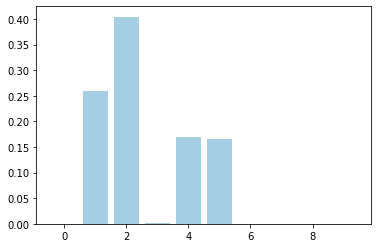

In [43]:
# get importance
importance = xgb_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Important Features are month,year,day of year,week are most important features

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.9993516650634908

By using Decision Tree we R2 score is 0.999 is very good R2 score

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.29674
Feature: 2, Score: 0.34083
Feature: 3, Score: 0.00402
Feature: 4, Score: 0.27060
Feature: 5, Score: 0.08766
Feature: 6, Score: 0.00013
Feature: 7, Score: 0.00002
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


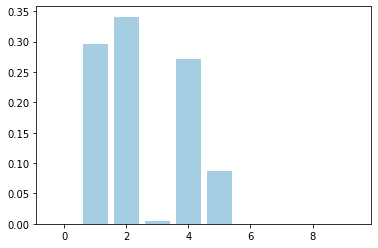

In [47]:
# get importance
importance = dt_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Important Features are month,year,day of year,week are most important features

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.9994319281801314

By using Random Forest R2 score is 0.999 is good R2 score

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.29665
Feature: 2, Score: 0.05713
Feature: 3, Score: 0.00238
Feature: 4, Score: 0.46973
Feature: 5, Score: 0.17390
Feature: 6, Score: 0.00016
Feature: 7, Score: 0.00004
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00001


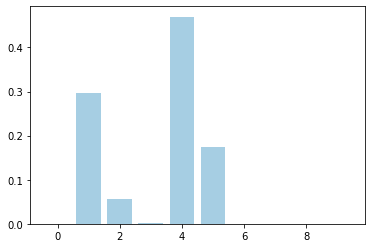

In [49]:
# get importance
importance = rf_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Important Features are day of year is most important (day of year,year,week,month)

# KNN

In [50]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance


# define the model
knn= KNeighborsRegressor()
# fit the model

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8716722374036648

In [52]:
X_train

,item,year,month,day_of_month,day_of_year,week,day_of_week,is_kind,is_month_start,is_month_end
198,1,2013,7,18,199,29,3,0,0,0
557,1,2014,7,12,193,28,5,1,0,0
512,1,2014,5,28,148,22,2,0,0,0
1042,1,2015,11,9,313,46,0,0,0,0
317,1,2013,11,14,318,46,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
835,1,2015,4,16,106,16,3,0,0,0
1216,1,2016,5,1,122,17,6,1,1,0
1653,1,2017,7,12,193,28,2,0,0,0
559,1,2014,7,14,195,29,0,0,0,0


KNNs R2 score is low as compare other models

Feature: 0, Score: 0.00000
Feature: 1, Score: 2686492.11864
Feature: 2, Score: 70.34224
Feature: 3, Score: 1208899.14587
Feature: 4, Score: 18900790.20511
Feature: 5, Score: 1970886.72753
Feature: 6, Score: 719865.97806
Feature: 7, Score: -16058.98066
Feature: 8, Score: -925.87210
Feature: 9, Score: -1623.71739


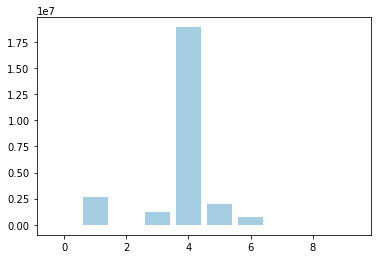

In [51]:
# perform permutation importance
results = permutation_importance(knn, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Important Features are day of year is most important (day of year,year,week,day of month and day of week)

# #Conclusion:
# 1.from above model best model is Random forest R2 score is 0.99946 is very good R2 score

# 2.Important Features are day of year is most important (day of year,year,week,month)